In [1]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils


In [2]:
im = cv2.imread('scanned-form.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [3]:
def show_im(im):
    plt.figure(figsize=(5,5))
    plt.imshow(im, cmap='gray')

In [4]:
def get_center_contour(cnt):
    M = cv2.moments(con)
    return (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

In [5]:
#auto rotate images
thres = cv2.adaptiveThreshold(im, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,31,28)
im2, cnts, hierarchy = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
draw_im = np.zeros_like(thres)
h, w = draw_im.shape
C = (0,0)
for i,con in enumerate(cnts):
    #remove noise
    if cv2.contourArea(con) < 100:
        continue
    #compute the center of the contour
    cX, cY = get_center_contour(con)
    
    rotated_angle = cv2.minAreaRect(con)[-1]
    R = cv2.getRotationMatrix2D((cX,cY),rotated_angle, 1.0)
    rotated = cv2.warpAffine(im, R, (w, h))
    break

<IPython.core.display.Javascript object>


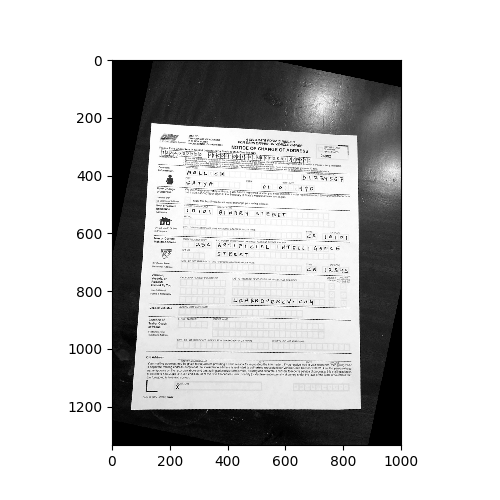

In [6]:
show_im(rotated)